## Image Classification

In [47]:
from fastai.vision.all import *

In [54]:
path = untar_data(URLs.PETS)/'images'

# cats
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, 
    get_image_files(path), 
    valid_pct=0.2, 
    seed=42,
    label_func=is_cat, 
    item_tfms=Resize(224)
)

learn = vision_learner(dls, resnet34, metrics=error_rate)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [64]:
# learn.fine_tune(1)
# learn.save('catdog')

Uncomment above to retrain 

In [57]:
learn = learn.load('catdog')

In [58]:
import ipywidgets as widgets

In [59]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

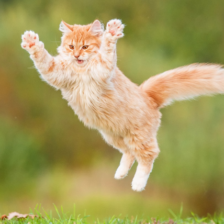

In [62]:
img = PILImage.create(uploader.data[0]); Resize(224)(img)

In [63]:
learn.predict(img)

('True', TensorBase(1), TensorBase([0.0314, 0.9686]))

## Image Segmentation

In [66]:
path = untar_data(URLs.CAMVID_TINY); path.ls()

(#3) [Path('/home/jupyter/.fastai/data/camvid_tiny/labels'),Path('/home/jupyter/.fastai/data/camvid_tiny/codes.txt'),Path('/home/jupyter/.fastai/data/camvid_tiny/images')]

In [73]:
(path/'labels').ls()

(#100) [Path('/home/jupyter/.fastai/data/camvid_tiny/labels/0016E5_08085_P.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/labels/0006R0_f02490_P.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/labels/0016E5_08155_P.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/labels/Seq05VD_f00210_P.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/labels/Seq05VD_f01080_P.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/labels/0006R0_f03210_P.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/labels/Seq05VD_f03090_P.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/labels/0016E5_06240_P.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/labels/0001TP_009360_P.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/labels/0006R0_f02550_P.png')...]

In [68]:
paths = get_image_files(path/'images'); paths

(#100) [Path('/home/jupyter/.fastai/data/camvid_tiny/images/Seq05VD_f00990.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/images/0016E5_08093.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/images/Seq05VD_f03090.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/images/Seq05VD_f03660.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/images/Seq05VD_f00810.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/images/0016E5_02250.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/images/0006R0_f02490.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/images/Seq05VD_f03060.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/images/Seq05VD_f01260.png'),Path('/home/jupyter/.fastai/data/camvid_tiny/images/0016E5_07997.png')...]

In [74]:
paths[0].stem, paths[0].suffix

('Seq05VD_f00990', '.png')

In [75]:
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames = get_image_files(path/'images'),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

In [76]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter',
       'OtherMoving', 'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone', 'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [80]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.779757,2.312778,00:01


epoch,train_loss,valid_loss,time
0,1.826646,1.518246,00:01
1,1.591820,1.183018,00:01
2,1.409654,1.101436,00:01
3,1.280977,1.016759,00:02
4,1.167388,0.830729,00:01
5,1.064448,0.863608,00:01
6,0.977258,0.823757,00:01
7,0.905196,0.810727,00:01


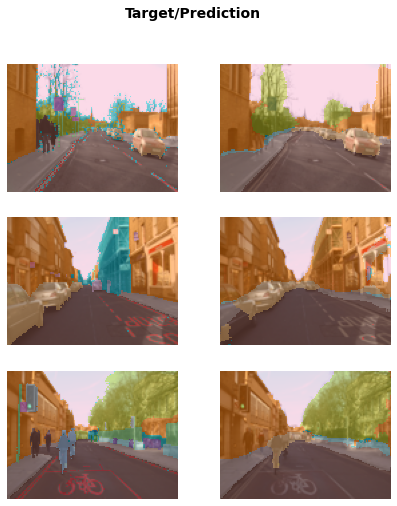

In [84]:
learn.show_results(max_n=3, figsize=(7,8))

In [85]:
from fastai.text.all import * 

In [86]:
path = untar_data(URLs.IMDB); path.ls()

(#8) [Path('/home/jupyter/.fastai/data/imdb/test'),Path('/home/jupyter/.fastai/data/imdb/tmp_lm'),Path('/home/jupyter/.fastai/data/imdb/imdb.vocab'),Path('/home/jupyter/.fastai/data/imdb/train'),Path('/home/jupyter/.fastai/data/imdb/unsup'),Path('/home/jupyter/.fastai/data/imdb/models'),Path('/home/jupyter/.fastai/data/imdb/tmp_clas'),Path('/home/jupyter/.fastai/data/imdb/README')]

In [87]:
dls = TextDataLoaders.from_folder(
    path,
    valid='test'    
)

In [88]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [89]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.463478,0.384209,0.827680,03:40


epoch,train_loss,valid_loss,accuracy,time
0,0.300625,0.296400,0.878600,07:03
1,0.244752,0.272693,0.894040,07:03
2,0.175070,0.197089,0.927680,07:02
3,0.152071,0.196375,0.927800,07:03


In [98]:
learn.save('imdb_sentiment')

Path('/home/jupyter/.fastai/data/imdb/models/imdb_sentiment.pth')

In [101]:
learn = learn.load('imdb_sentiment')

In [102]:
learn.predict("wildly good and bad movie. but mostly bad. real bad")

('pos', tensor(1), tensor([0.2712, 0.7288]))

## Tabular data 

In [103]:
from fastai.tabular.all import * 

In [104]:
path = untar_data(URLs.ADULT_SAMPLE); path.ls()

(#3) [Path('/home/jupyter/.fastai/data/adult_sample/export.pkl'),Path('/home/jupyter/.fastai/data/adult_sample/models'),Path('/home/jupyter/.fastai/data/adult_sample/adult.csv')]

In [106]:
pd.read_csv(path/'adult.csv').head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [108]:
dls = TabularDataLoaders.from_csv(
    path/'adult.csv',
    path=path,
    y_names = "salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize]
)

In [109]:
learn = tabular_learner(dls, metrics=accuracy)

In [112]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.370576,0.366562,0.829238,00:03
1,0.364023,0.364438,0.824017,00:03
2,0.351153,0.360034,0.832770,00:03
3,0.361608,0.349015,0.839066,00:03
4,0.339990,0.351594,0.838913,00:04
